In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [2]:
N = 1024   # Number of points in DFT
Fs = 1000  # Sampling frequency

# Compute frequency bins using NumPy
freq_bins = np.fft.fftfreq(N, d=1/Fs)

print(freq_bins[:10])  # Print first 10 frequency bins

[0.        0.9765625 1.953125  2.9296875 3.90625   4.8828125 5.859375
 6.8359375 7.8125    8.7890625]


In [3]:
# Generate a sample audio signal
Fs = 1000  # Sampling rate (1000 Hz)
T = 1 / Fs  # Sampling interval
t = np.linspace(0, 1, Fs, endpoint=False)  # 1 second time vector

In [4]:
# Generate a pure sine wave (440 Hz, like an "A4" musical note)
freq_signal = 440
pure_signal = np.sin(2 * np.pi * freq_signal * t)

# Add random noise
noise = np.random.normal(0, 0.5, pure_signal.shape)
noisy_signal = pure_signal + noise

# Apply FFT
fft_signal = fft(noisy_signal)
freqs = fftfreq(len(fft_signal), T)  # Frequency bins

# Filter: Remove frequencies higher than 500 Hz
fft_filtered = fft_signal.copy()
fft_filtered[np.abs(freqs) > 500] = 0  # Zero out high frequencies (noise)

# Apply Inverse FFT to get the cleaned signal (back to the time domain)
cleaned_signal = ifft(fft_filtered).real

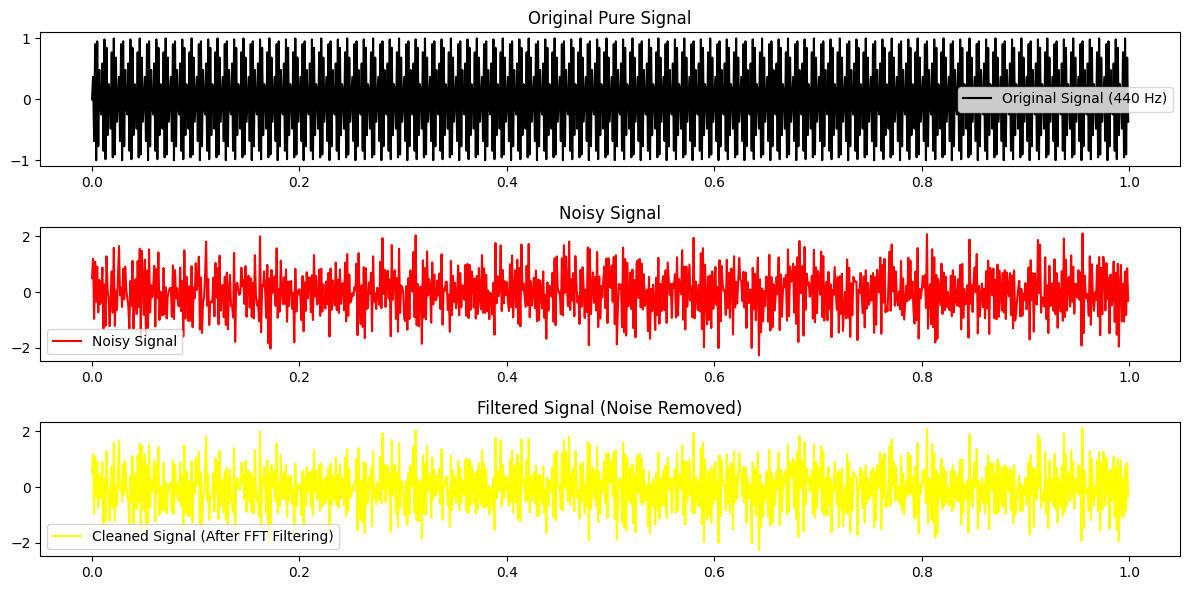

In [5]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pure_signal, label="Original Signal (440 Hz)",color="black")
plt.legend()
plt.title("Original Pure Signal")

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal", color="red")
plt.legend()
plt.title("Noisy Signal")

plt.subplot(3, 1, 3)
plt.plot(t, cleaned_signal, label="Cleaned Signal (After FFT Filtering)", color="yellow")
plt.legend()
plt.title("Filtered Signal (Noise Removed)")

plt.tight_layout()
plt.show()